# Climate Hackathon
This notebook serves as the main interaction point for the model. 

See the README.md and diagrams for more information about the model's structure.

In [4]:
from model.types import ModelConfig, ClimateRiskType
from model.model import ClimateInsuranceModel

import mesa
import pandas as pd
import seaborn as sns
import numpy as np

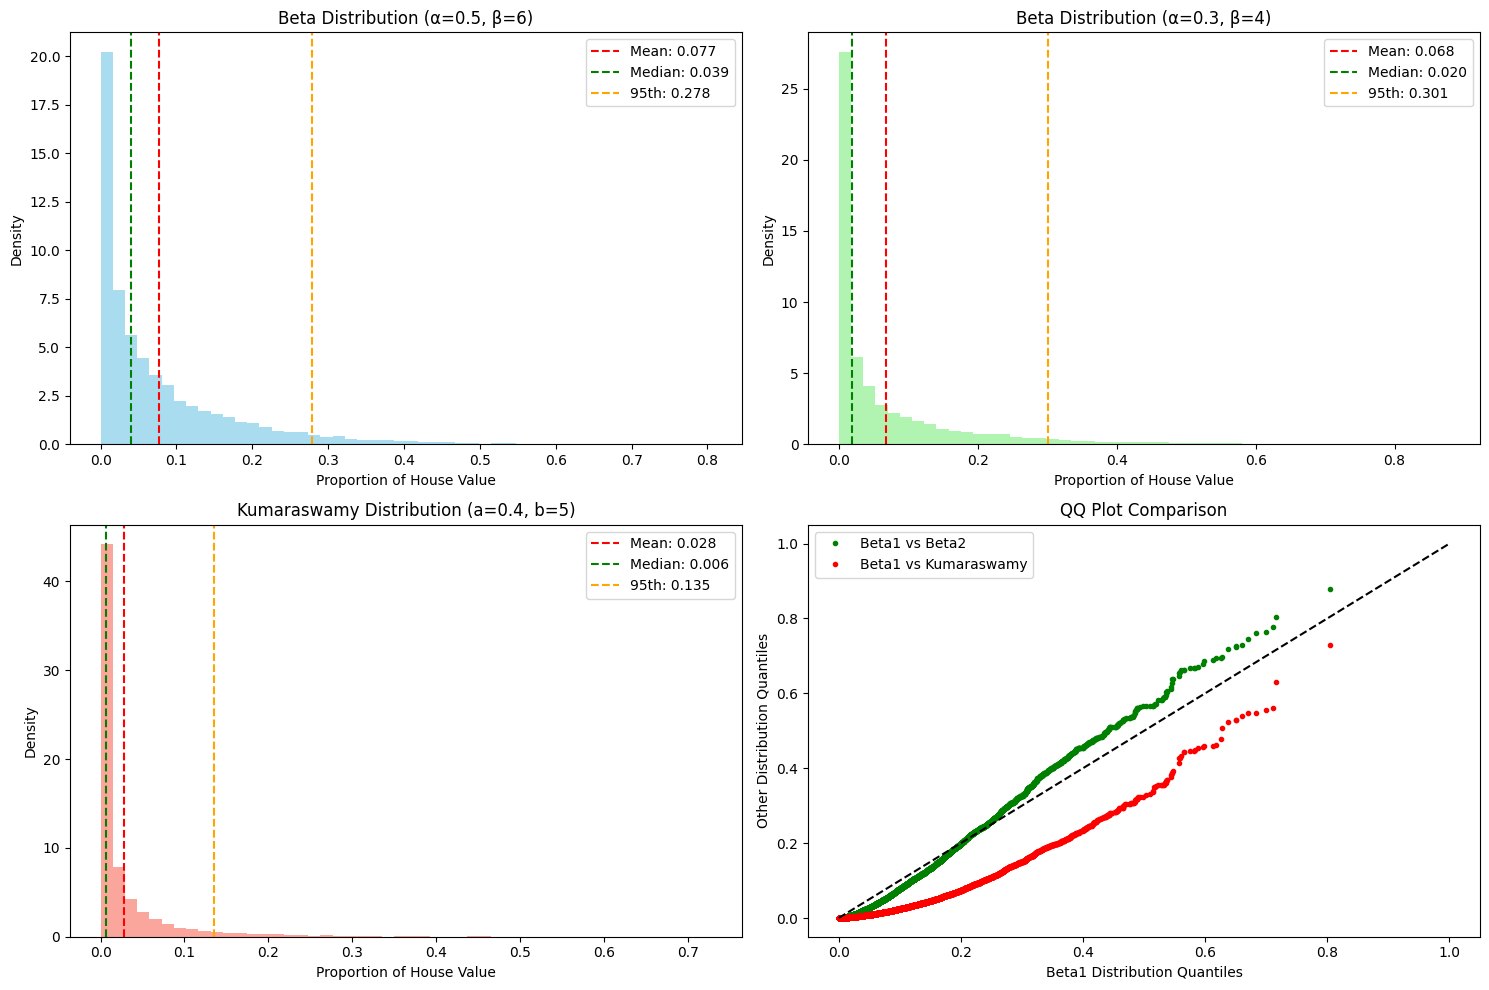


Beta Distribution 1 (α=0.5, β=6):
Mean: 0.077
Median: 0.039
95th percentile: 0.278
99th percentile: 0.437
Skewness: 2.090

Beta Distribution 2 (α=0.3, β=4):
Mean: 0.068
Median: 0.020
95th percentile: 0.301
99th percentile: 0.498
Skewness: 2.499

Kumaraswamy Distribution (a=0.4, b=5):
Mean: 0.028
Median: 0.006
95th percentile: 0.135
99th percentile: 0.272
Skewness: 4.021


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
n_samples = 10000

# Create figure for comparing distributions
plt.figure(figsize=(15, 10))

# 1. Beta distribution with heavy right tail
alpha1, beta1 = 0.5, 6  # This creates a very right-skewed distribution
beta_samples = np.random.beta(alpha1, beta1, n_samples)

# 2. Alternative Beta parameterization
alpha2, beta2 = 0.3, 4  # Even more right-skewed
beta_samples2 = np.random.beta(alpha2, beta2, n_samples)

# 3. Kumaraswamy distribution (similar to Beta but easier to interpret parameters)
# Implementing using inverse CDF method
def kumaraswamy_samples(a, b, size):
    u = np.random.uniform(0, 1, size)
    return (1 - (1 - u)**(1/b))**(1/a)

kum_samples = kumaraswamy_samples(0.4, 5, n_samples)

# Create subplots
plt.subplot(2, 2, 1)
plt.hist(beta_samples, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title(f'Beta Distribution (α={alpha1}, β={beta1})')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
# Add vertical lines for key statistics
plt.axvline(np.mean(beta_samples), color='red', linestyle='--', label=f'Mean: {np.mean(beta_samples):.3f}')
plt.axvline(np.median(beta_samples), color='green', linestyle='--', label=f'Median: {np.median(beta_samples):.3f}')
plt.axvline(np.percentile(beta_samples, 95), color='orange', linestyle='--', label=f'95th: {np.percentile(beta_samples, 95):.3f}')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(beta_samples2, bins=50, density=True, alpha=0.7, color='lightgreen')
plt.title(f'Beta Distribution (α={alpha2}, β={beta2})')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
plt.axvline(np.mean(beta_samples2), color='red', linestyle='--', label=f'Mean: {np.mean(beta_samples2):.3f}')
plt.axvline(np.median(beta_samples2), color='green', linestyle='--', label=f'Median: {np.median(beta_samples2):.3f}')
plt.axvline(np.percentile(beta_samples2, 95), color='orange', linestyle='--', label=f'95th: {np.percentile(beta_samples2, 95):.3f}')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(kum_samples, bins=50, density=True, alpha=0.7, color='salmon')
plt.title('Kumaraswamy Distribution (a=0.4, b=5)')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
plt.axvline(np.mean(kum_samples), color='red', linestyle='--', label=f'Mean: {np.mean(kum_samples):.3f}')
plt.axvline(np.median(kum_samples), color='green', linestyle='--', label=f'Median: {np.median(kum_samples):.3f}')
plt.axvline(np.percentile(kum_samples, 95), color='orange', linestyle='--', label=f'95th: {np.percentile(kum_samples, 95):.3f}')
plt.legend()

# Combined QQ plot
plt.subplot(2, 2, 4)
plt.plot(np.sort(beta_samples), np.sort(beta_samples2), 'g.', label='Beta1 vs Beta2')
plt.plot(np.sort(beta_samples), np.sort(kum_samples), 'r.', label='Beta1 vs Kumaraswamy')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('QQ Plot Comparison')
plt.xlabel('Beta1 Distribution Quantiles')
plt.ylabel('Other Distribution Quantiles')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics for each distribution
print("\nBeta Distribution 1 (α=0.5, β=6):")
print(f"Mean: {np.mean(beta_samples):.3f}")
print(f"Median: {np.median(beta_samples):.3f}")
print(f"95th percentile: {np.percentile(beta_samples, 95):.3f}")
print(f"99th percentile: {np.percentile(beta_samples, 99):.3f}")
print(f"Skewness: {stats.skew(beta_samples):.3f}")

print("\nBeta Distribution 2 (α=0.3, β=4):")
print(f"Mean: {np.mean(beta_samples2):.3f}")
print(f"Median: {np.median(beta_samples2):.3f}")
print(f"95th percentile: {np.percentile(beta_samples2, 95):.3f}")
print(f"99th percentile: {np.percentile(beta_samples2, 99):.3f}")
print(f"Skewness: {stats.skew(beta_samples2):.3f}")

print("\nKumaraswamy Distribution (a=0.4, b=5):")
print(f"Mean: {np.mean(kum_samples):.3f}")
print(f"Median: {np.median(kum_samples):.3f}")
print(f"95th percentile: {np.percentile(kum_samples, 95):.3f}")
print(f"99th percentile: {np.percentile(kum_samples, 99):.3f}")
print(f"Skewness: {stats.skew(kum_samples):.3f}")

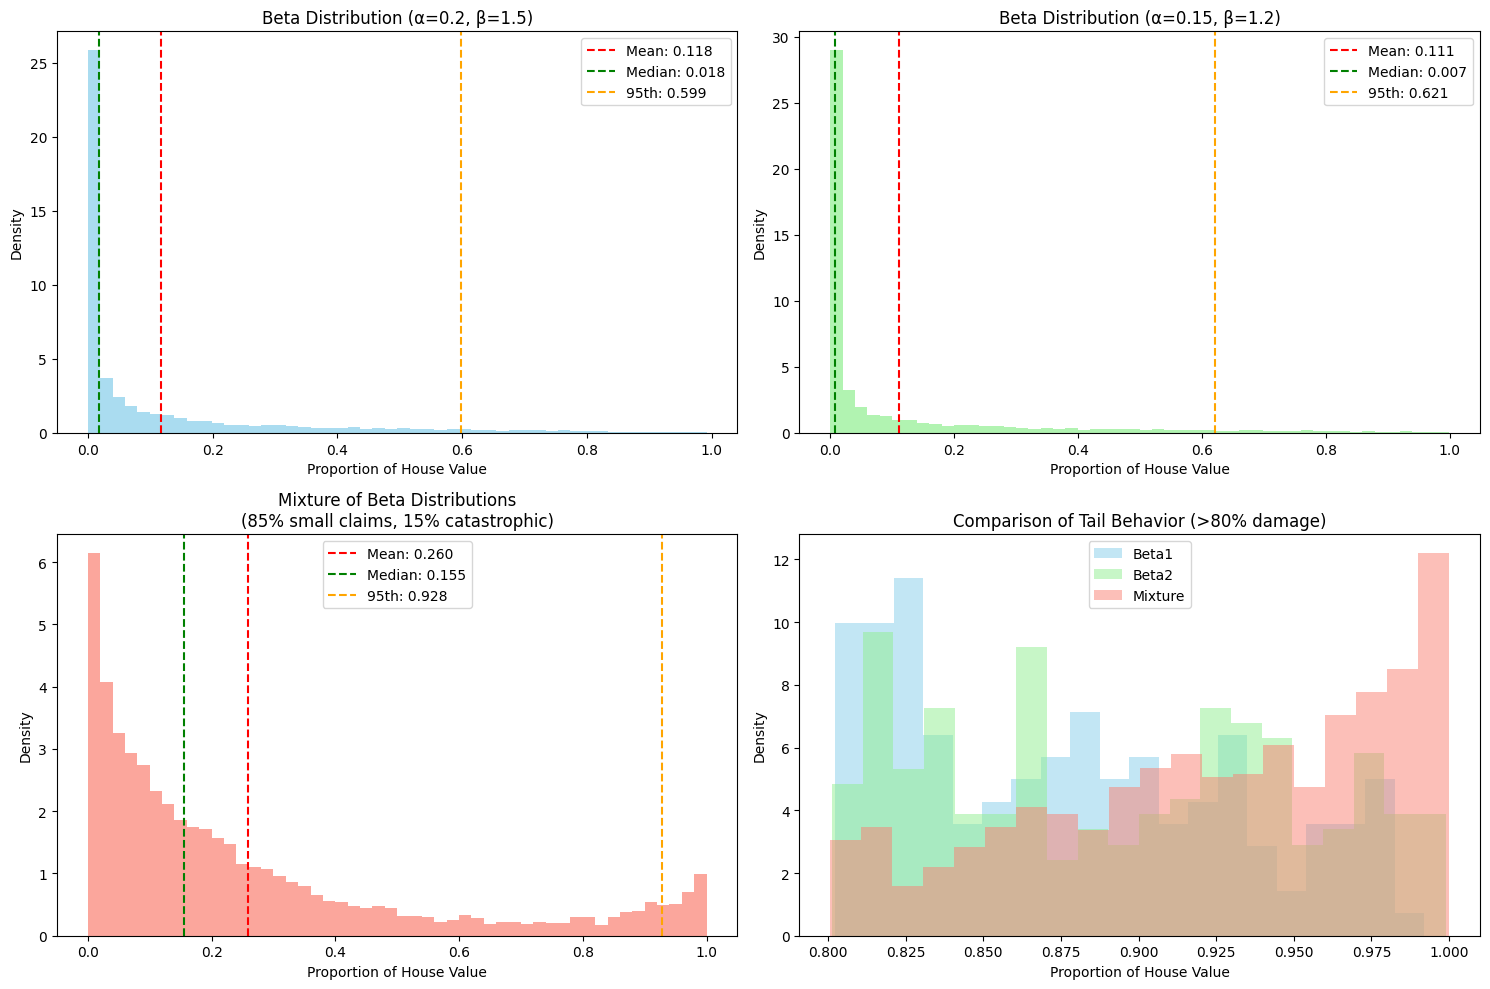


Beta Distribution 1 (α=0.2, β=1.5):
Mean: 0.118
Median: 0.018
95th percentile: 0.599
99th percentile: 0.835
Probability of >80% damage: 0.015
Probability of >90% damage: 0.005

Beta Distribution 2 (α=0.15, β=1.2):
Mean: 0.111
Median: 0.007
95th percentile: 0.621
99th percentile: 0.897
Probability of >80% damage: 0.021
Probability of >90% damage: 0.010

Mixture Distribution:
Mean: 0.260
Median: 0.155
95th percentile: 0.928
99th percentile: 0.992
Probability of >80% damage: 0.096
Probability of >90% damage: 0.065


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
n_samples = 10000

# Create figure for comparing distributions
plt.figure(figsize=(15, 10))

# 1. Beta distribution with very heavy right tail
alpha1, beta1 = 0.2, 1.5  # Much more right-skewed than before
beta_samples = np.random.beta(alpha1, beta1, n_samples)

# 2. Alternative Beta parameterization
alpha2, beta2 = 0.15, 1.2  # Even more extreme
beta_samples2 = np.random.beta(alpha2, beta2, n_samples)

# 3. Mixture of two Beta distributions to create bimodal effect
# This creates a mixture of mostly small claims with a second mode near total loss
def mixture_beta_samples(n_samples):
    # 85% of events from first distribution (small claims)
    # 15% of events from second distribution (catastrophic/total loss)
    mask = np.random.random(n_samples) < 0.85
    samples = np.zeros(n_samples)
    samples[mask] = np.random.beta(0.8, 4, sum(mask))  # Small claims
    samples[~mask] = np.random.beta(4, 0.8, sum(~mask))  # Catastrophic events
    return samples

mixture_samples = mixture_beta_samples(n_samples)

# Create subplots
plt.subplot(2, 2, 1)
plt.hist(beta_samples, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title(f'Beta Distribution (α={alpha1}, β={beta1})')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
plt.axvline(np.mean(beta_samples), color='red', linestyle='--', label=f'Mean: {np.mean(beta_samples):.3f}')
plt.axvline(np.median(beta_samples), color='green', linestyle='--', label=f'Median: {np.median(beta_samples):.3f}')
plt.axvline(np.percentile(beta_samples, 95), color='orange', linestyle='--', label=f'95th: {np.percentile(beta_samples, 95):.3f}')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(beta_samples2, bins=50, density=True, alpha=0.7, color='lightgreen')
plt.title(f'Beta Distribution (α={alpha2}, β={beta2})')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
plt.axvline(np.mean(beta_samples2), color='red', linestyle='--', label=f'Mean: {np.mean(beta_samples2):.3f}')
plt.axvline(np.median(beta_samples2), color='green', linestyle='--', label=f'Median: {np.median(beta_samples2):.3f}')
plt.axvline(np.percentile(beta_samples2, 95), color='orange', linestyle='--', label=f'95th: {np.percentile(beta_samples2, 95):.3f}')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(mixture_samples, bins=50, density=True, alpha=0.7, color='salmon')
plt.title('Mixture of Beta Distributions\n(85% small claims, 15% catastrophic)')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
plt.axvline(np.mean(mixture_samples), color='red', linestyle='--', label=f'Mean: {np.mean(mixture_samples):.3f}')
plt.axvline(np.median(mixture_samples), color='green', linestyle='--', label=f'Median: {np.median(mixture_samples):.3f}')
plt.axvline(np.percentile(mixture_samples, 95), color='orange', linestyle='--', label=f'95th: {np.percentile(mixture_samples, 95):.3f}')
plt.legend()

# Tail behavior comparison
plt.subplot(2, 2, 4)
plt.hist(beta_samples[beta_samples > 0.8], bins=20, density=True, alpha=0.5, label='Beta1', color='skyblue')
plt.hist(beta_samples2[beta_samples2 > 0.8], bins=20, density=True, alpha=0.5, label='Beta2', color='lightgreen')
plt.hist(mixture_samples[mixture_samples > 0.8], bins=20, density=True, alpha=0.5, label='Mixture', color='salmon')
plt.title('Comparison of Tail Behavior (>80% damage)')
plt.xlabel('Proportion of House Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics for each distribution
print("\nBeta Distribution 1 (α=0.2, β=1.5):")
print(f"Mean: {np.mean(beta_samples):.3f}")
print(f"Median: {np.median(beta_samples):.3f}")
print(f"95th percentile: {np.percentile(beta_samples, 95):.3f}")
print(f"99th percentile: {np.percentile(beta_samples, 99):.3f}")
print(f"Probability of >80% damage: {np.mean(beta_samples > 0.8):.3f}")
print(f"Probability of >90% damage: {np.mean(beta_samples > 0.9):.3f}")

print("\nBeta Distribution 2 (α=0.15, β=1.2):")
print(f"Mean: {np.mean(beta_samples2):.3f}")
print(f"Median: {np.median(beta_samples2):.3f}")
print(f"95th percentile: {np.percentile(beta_samples2, 95):.3f}")
print(f"99th percentile: {np.percentile(beta_samples2, 99):.3f}")
print(f"Probability of >80% damage: {np.mean(beta_samples2 > 0.8):.3f}")
print(f"Probability of >90% damage: {np.mean(beta_samples2 > 0.9):.3f}")

print("\nMixture Distribution:")
print(f"Mean: {np.mean(mixture_samples):.3f}")
print(f"Median: {np.median(mixture_samples):.3f}")
print(f"95th percentile: {np.percentile(mixture_samples, 95):.3f}")
print(f"99th percentile: {np.percentile(mixture_samples, 99):.3f}")
print(f"Probability of >80% damage: {np.mean(mixture_samples > 0.8):.3f}")
print(f"Probability of >90% damage: {np.mean(mixture_samples > 0.9):.3f}")

## Usage example

In [3]:
conf = ModelConfig(
    n_households=1000,
    n_insurers=5,
    initial_insurer_capital=100000.0,
    climate_change_rate=0.01,
    grid_width=50,
    grid_height=50,
    uk_shapefile_path="data/input/Regions_Dec_2020_EN_BUC/RGN_DEC_2020_EN_BUC.shp",
    base_risk_levels={
        ClimateRiskType.FLOOD: 0.02,
        ClimateRiskType.SUBSIDENCE: 0.01,
        ClimateRiskType.STORM: 0.03,
    },
)

In [4]:
ClimateModel = ClimateInsuranceModel(conf)

/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_0 is being placed with
place_agent() despite already having the position (0, 0). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_1 is being placed with
place_agent() despite already having the position (0, 1). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_2 is being placed with
place_agent() despite already having the position (0, 2). In most
cases, you'd want to clear the current position with remove_agent()
befor

In [6]:
print(dir(ClimateModel))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_advance_time', '_agents', '_agents_by_type', '_all_agents', '_calculate_mean_climate_risk', '_create_grid_cells', '_create_households', '_create_insurers', '_get_random_valid_position', '_seed', '_setup_agent_registration', '_steps', '_time', 'agent_types', 'agents', 'agents_by_type', 'apply_climate_shock', 'config', 'current_id', 'datacollector', 'deregister_agent', 'get_agents_of_type', 'grid', 'initialize_data_collector', 'insurers', 'next_id', 'random', 'register_agent', 'reset_randomizer', 'run_model', 'running', 'schedule', 'step', 'uk_boundaries']


## Batch run and write outputs

See [**this link**](https://mesa.readthedocs.io/stable/tutorials/intro_tutorial.html#batch-run) for more info

In [11]:
conf = ModelConfig(
    n_households=1000,
    n_insurers=5,
    initial_insurer_capital=100000.0,
    climate_change_rate=0.01,
    grid_width=50,
    grid_height=50,
    uk_shapefile_path="data/input/Regions_Dec_2020_EN_BUC/RGN_DEC_2020_EN_BUC.shp",
    base_risk_levels={
        ClimateRiskType.FLOOD: 0.02,
        ClimateRiskType.SUBSIDENCE: 0.01,
        ClimateRiskType.STORM: 0.03,
    },
)

# Create the required dictionary of model inputs
params = {'config': conf}

# Will probably need to extract these out of the class to allow for parametrisation by mesa itself.

In [12]:
results = mesa.batch_run(
    ClimateInsuranceModel,
    parameters=params,
    iterations=1, # Currently not providing parameters as a range
    data_collection_period=1, # Collect data after the first step
    max_steps=100,
    display_progress=True,
)

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_0 is being placed with
place_agent() despite already having the position (0, 0). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_1 is being placed with
place_agent() despite already having the position (0, 1). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_2 is being placed with
place_agent() despite already having the position (0, 2). In most
cases, you'd want to clear the current position with remove_agent()
befor

In [39]:
results_df = pd.DataFrame(results)
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354005 entries, 0 to 354004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RunId                  354005 non-null  int64  
 1   iteration              354005 non-null  int64  
 2   Step                   354005 non-null  int64  
 3   config                 354005 non-null  object 
 4   Mean_Premium           354005 non-null  float64
 5   Total_Insurer_Capital  354005 non-null  float64
 6   Mean_Climate_Risk      354005 non-null  float64
 7   AgentID                354005 non-null  object 
 8   Capital                505 non-null     float64
 9   Claims_Paid            505 non-null     float64
 10  Premiums_Collected     505 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.7+ MB


<Axes: xlabel='Step'>

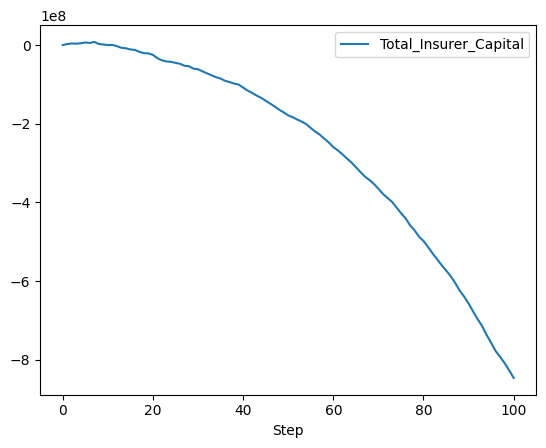

In [35]:
results_df[['Step', 'Total_Insurer_Capital']].groupby('Step').mean().plot()

<Axes: xlabel='Step'>

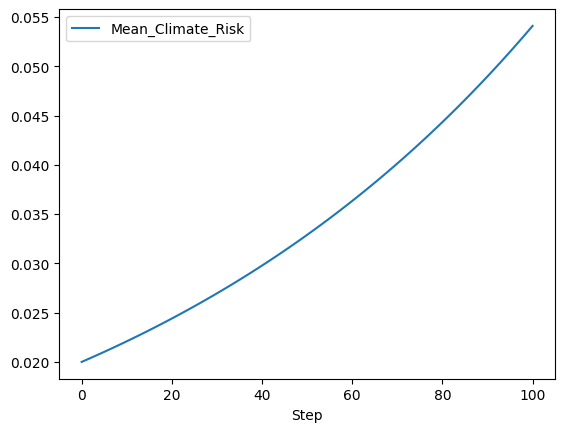

In [36]:
results_df[['Step', 'Mean_Climate_Risk']].groupby('Step').mean().plot()

<Axes: xlabel='Step'>

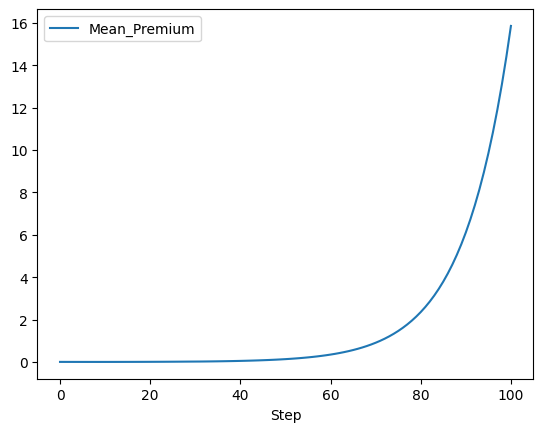

In [38]:
results_df[['Step', 'Mean_Premium']].groupby('Step').mean().plot()